In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/starbucks_drinkMenu_expanded.csv')

In [3]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
data.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

some of the column name has space at left and right side

In [5]:
data.columns = data.columns.str.lstrip()

In [6]:
data.columns = data.columns.str.rstrip()

In [7]:
data.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

In [8]:
data.isnull().sum()

,0
Beverage_category,0
Beverage,0
Beverage_prep,0
Calories,0
Total Fat (g),0
Trans Fat (g),0
Saturated Fat (g),0
Sodium (mg),0
Total Carbohydrates (g),0
Cholesterol (mg),0


we have only 1 null value in caffeine column

In [9]:
data[data.isnull().any(axis = 1)]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN


In [10]:
new_data = data.fillna(90)

refer using this link: https://stories.starbucks.com/uploads/2019/01/nutrition-1.pdf

In [11]:
new_data[new_data['Caffeine (mg)'] == 90]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,90


In [12]:
new_data.isnull().sum()

,0
Beverage_category,0
Beverage,0
Beverage_prep,0
Calories,0
Total Fat (g),0
Trans Fat (g),0
Saturated Fat (g),0
Sodium (mg),0
Total Carbohydrates (g),0
Cholesterol (mg),0


In [13]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

Total Fat (g) , Vitamin A (% DV) , Vitamin C (% DV) , Calcium (% DV) , Iron (% DV) and Caffeine (mg) column should be of integer / float data type

In [14]:
new_data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

we need to change the 3 2 value to 32

In [15]:
new_data['Total Fat (g)'] = new_data['Total Fat (g)'].replace('3 2', '32')

In [16]:
new_data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '32'], dtype=object)

In [17]:
new_data['Total Fat (g)'] = new_data['Total Fat (g)'].astype(float)
new_data['Total Fat (g)'].unique()

array([ 0.1,  3.5,  2.5,  0.2,  6. ,  4.5,  0.3,  7. ,  5. ,  0.4,  9. ,
        1.5,  4. ,  2. ,  8. ,  3. , 11. ,  0. ,  1. , 10. , 15. , 13. ,
        0.5, 32. ])

In [18]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    float64
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [19]:
new_data['Vitamin A (% DV)'].unique()

array(['0%', '10%', '6%', '15%', '20%', '30%', '25%', '8%', '4%', '2%',
       '50%'], dtype=object)

In [20]:
new_data['Vitamin A (% DV)'] = new_data['Vitamin A (% DV)'].str.replace('%','')
new_data['Vitamin A (% DV)'].unique()

array(['0', '10', '6', '15', '20', '30', '25', '8', '4', '2', '50'],
      dtype=object)

In [21]:
new_data['Vitamin A (% DV)'] = new_data['Vitamin A (% DV)'].astype(int)
new_data['Vitamin A (% DV)'].unique()

array([ 0, 10,  6, 15, 20, 30, 25,  8,  4,  2, 50])

In [22]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    float64
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    int64  
 14  Vitamin C (% DV)         2

In [23]:
new_data['Vitamin C (% DV)'].unique()

array(['0%', '2%', '4%', '6%', '10%', '15%', '20%', '80%', '100%', '8%'],
      dtype=object)

In [24]:
new_data['Vitamin C (% DV)'] = new_data['Vitamin C (% DV)'].str.replace('%' , '')
new_data['Vitamin C (% DV)'].unique()

array(['0', '2', '4', '6', '10', '15', '20', '80', '100', '8'],
      dtype=object)

In [25]:
new_data['Vitamin C (% DV)'] = new_data['Vitamin C (% DV)'].astype(int)
new_data['Vitamin C (% DV)'].unique()

array([  0,   2,   4,   6,  10,  15,  20,  80, 100,   8])

In [26]:
new_data['Calcium (% DV)'].unique()

array(['0%', '2%', '20%', '30%', '40%', '50%', '15%', '25%', '35%', '45%',
       '10%', '60%', '6%', '8%'], dtype=object)

In [27]:
new_data['Calcium (% DV)'] = new_data['Calcium (% DV)'].str.replace('%' , '')
new_data['Calcium (% DV)'].unique()

array(['0', '2', '20', '30', '40', '50', '15', '25', '35', '45', '10',
       '60', '6', '8'], dtype=object)

In [28]:
new_data['Calcium (% DV)'] = new_data['Calcium (% DV)'].astype(int)
new_data['Calcium (% DV)'].unique()

array([ 0,  2, 20, 30, 40, 50, 15, 25, 35, 45, 10, 60,  6,  8])

In [29]:
new_data['Iron (% DV)'].unique()

array(['0%', '8%', '15%', '25%', '10%', '20%', '30%', '40%', '50%', '6%',
       '2%', '4%', '0.00%', '6.00%', '8.00%', '10.00%', '15.00%', '35%'],
      dtype=object)

In [30]:
new_data['Iron (% DV)'] = new_data['Iron (% DV)'].str.replace('%' , '')
new_data['Iron (% DV)'].unique()

array(['0', '8', '15', '25', '10', '20', '30', '40', '50', '6', '2', '4',
       '0.00', '6.00', '8.00', '10.00', '15.00', '35'], dtype=object)

In [31]:
new_data['Iron (% DV)'] = new_data['Iron (% DV)'].astype(float)
new_data['Iron (% DV)'].unique()

array([ 0.,  8., 15., 25., 10., 20., 30., 40., 50.,  6.,  2.,  4., 35.])

In [32]:
new_data['Iron (% DV)'] = new_data['Iron (% DV)'].astype(int)
new_data['Iron (% DV)'].unique()

array([ 0,  8, 15, 25, 10, 20, 30, 40, 50,  6,  2,  4, 35])

In [33]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    float64
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    int64  
 14  Vitamin C (% DV)         2

In [34]:
new_data['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', 90, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [35]:
new_data[new_data['Caffeine (mg)']=='Varies']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,Varies
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,Varies
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,Varies
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,Varies
167,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Grande,80,0.0,0.0,0.0,0,0,21,0,21,0.0,0,0,0,0,Varies
168,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Venti,120,0.0,0.0,0.0,0,0,31,0,31,0.0,0,0,0,0,Varies
169,Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...,Tall,100,0.0,0.0,0.0,0,0,25,0,24,0.1,0,10,0,0,Varies
170,Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...,Grande,130,0.0,0.0,0.0,0,0,33,0,33,0.1,0,15,0,0,Varies
171,Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...,Venti,190,0.0,0.0,0.0,0,0,49,0,49,0.1,0,20,0,0,Varies
172,Smoothies,Banana Chocolate Smoothie,Grande Nonfat Milk,280,2.5,1.5,0.0,5,150,53,7,34,20.0,10,15,20,0,Varies


assume

Tazo® Tea caffiene = 10

Shaken Iced Beverages = 20

Smoothies = 30

In [36]:
new_data.iloc[102:106] = new_data.iloc[102:106].replace('Varies',10)
new_data.iloc[167:172] = new_data.iloc[167:172].replace('Varies',20)
new_data.iloc[172] = new_data.iloc[172].replace('Varies',30)

In [37]:
new_data[new_data['Caffeine (mg)']=='Varies']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)


In [38]:
new_data[new_data['Caffeine (mg)']=='varies']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
130,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Short Nonfat Milk,80,0.1,0.1,0.0,0,45,16,0,16,4.0,6,0,10,0,varies
131,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,90,2.0,1.0,0.1,10,50,15,0,15,3.0,6,0,10,0,varies
132,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,80,1.5,0.2,0.0,0,40,14,0,13,3.0,4,0,10,6,varies
133,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Tall Nonfat Milk,120,0.1,0.1,0.0,5,65,23,0,23,5.0,10,0,20,0,varies
134,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,140,3.0,1.5,0.1,15,75,23,0,23,5.0,8,0,15,0,varies
135,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,130,2.5,0.3,0.0,0,60,21,1,19,4.0,6,0,20,8,varies
136,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Grande Nonfat Milk,150,0.2,0.1,0.0,5,85,31,0,31,7.0,15,0,25,0,varies
137,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,190,4.0,2.0,0.1,15,95,31,0,30,7.0,10,0,25,0,varies
138,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,170,3.5,0.4,0.0,0,80,27,1,25,6.0,8,0,25,10,varies
139,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Venti Nonfat Milk,190,0.2,0.1,0.0,5,110,39,0,39,9.0,15,0,30,0,varies


In [39]:
new_data['Caffeine (mg)'] = new_data['Caffeine (mg)'].replace('varies', '50')

In [40]:
new_data[new_data['Caffeine (mg)']=='varies']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)


In [41]:
new_data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0,75


In [42]:
new_data.to_csv('star_bucks.csv')

Explore Phrase

In [43]:
new_data.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

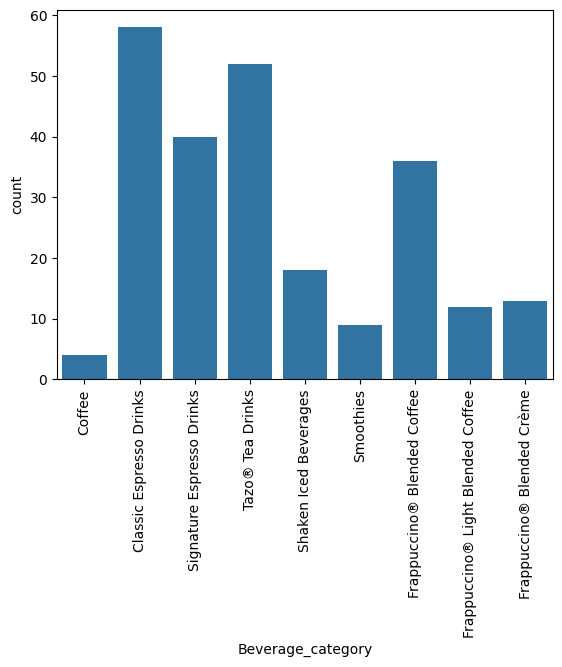

In [44]:
sns.countplot(data = new_data , x = 'Beverage_category')
plt.xticks(rotation = 90);

Classic Expresso category has more beverages followed by Tazo @ Tea drink and Frappuccino Blended Coffee

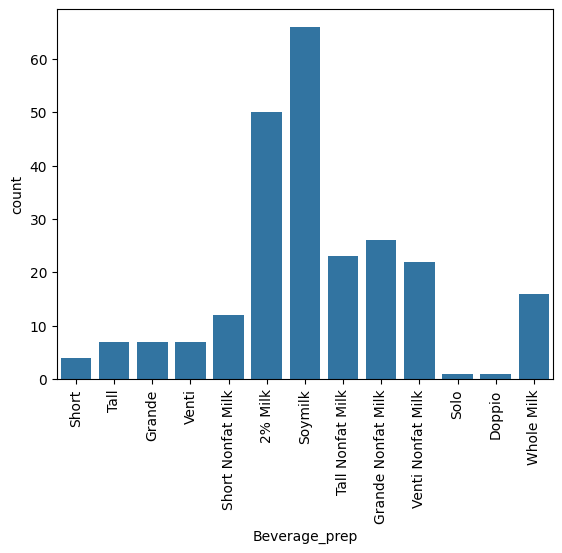

In [45]:

sns.countplot(data = new_data , x = 'Beverage_prep')
plt.xticks(rotation = 90);

Many beverages has soy milk followed by 2% Milk and Grande Nonfat Milk

<ipython-input-85-be8ed9528cc8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Calories'])


<Axes: xlabel='Calories', ylabel='Density'>

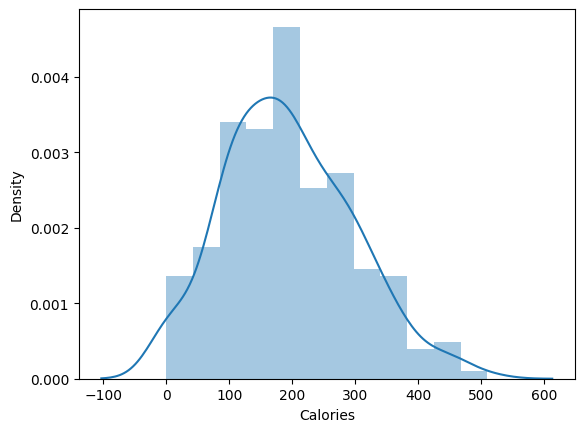

In [85]:
# calorie distribution

sns.distplot(new_data['Calories'])

most items have moderate calorie levels, but there are a few items with significantly higher calorie counts.

In [46]:
# which beverage has high calories

max_cal = new_data['Calories'].max()

new_data[new_data['Calories']==max_cal]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20,4,60,2,150


In [47]:
# which beverage has low calories

min_cal = new_data['Calories'].min()

new_data[new_data['Calories']==min_cal]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,10
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,10
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,10
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,10


In [48]:
# which beverage has high sugar

max_sug = new_data['Sugars (g)'].max()

new_data[new_data['Sugars (g)']==max_sug]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5.0,4.0,0.0,5,340,90,2,84,7.0,10,0,20,35,145
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10.0,7.0,0.2,15,340,90,2,84,7.0,6,0,15,35,145


Notice that as the beverage has high sugar - high calories

<Axes: xlabel='Calories', ylabel='Sugars (g)'>

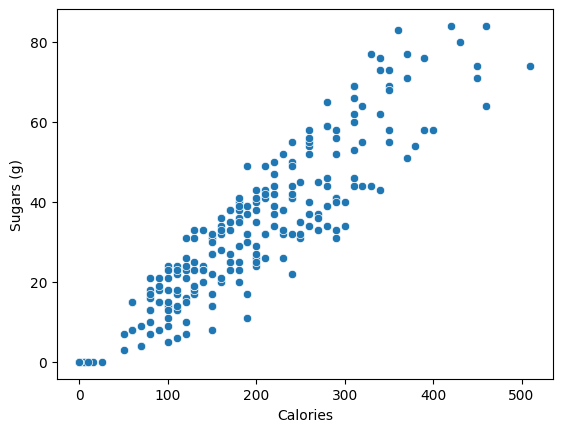

In [49]:
# relationship b/w sugar and calories

sns.scatterplot(data = new_data , x = 'Calories' , y = 'Sugars (g)')

as u can see in the graph, increase in sugar leads to increase in calories

<Axes: xlabel='Cholesterol (mg)', ylabel='Sugars (g)'>

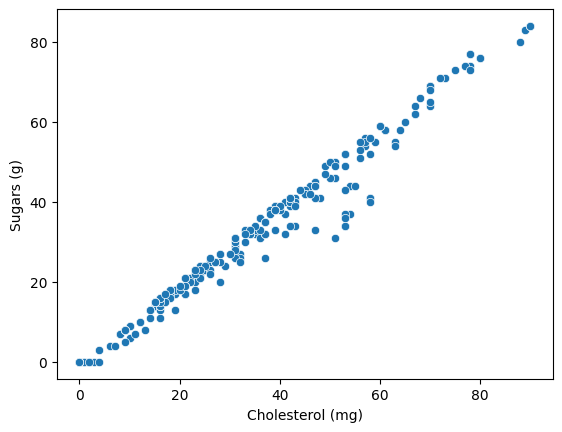

In [50]:
# relation b/w sugar and cholestrol

sns.scatterplot(data = new_data , x = 'Cholesterol (mg)' , y = 'Sugars (g)')

as u can see in the graph, increase in sugar leads to increase in cholestrol

<ipython-input-86-7f53d9451421>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Sugars (g)'])


<Axes: xlabel='Sugars (g)', ylabel='Density'>

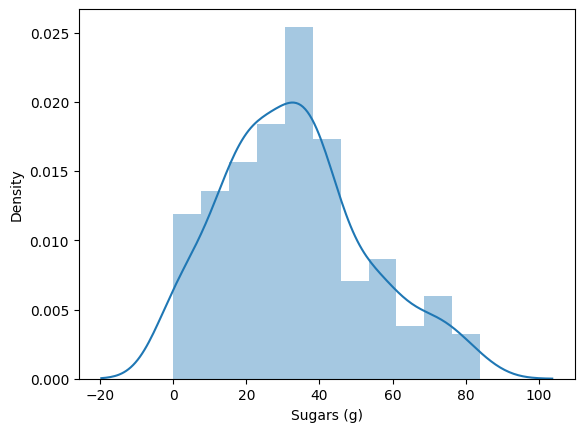

In [86]:
# sugar distribution

sns.distplot(new_data['Sugars (g)'])

many items have moderate sugar content, there are some with high sugar levels.

In [51]:
# which beverage has low sugar

min_sug = new_data['Sugars (g)'].min()

new_data[new_data['Sugars (g)']==min_sug]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
40,Classic Espresso Drinks,Caffè Americano,Short,5,0.0,0.0,0.0,0,5,1,0,0,0.4,0,0,0,0,75
41,Classic Espresso Drinks,Caffè Americano,Tall,10,0.0,0.0,0.0,0,10,2,0,0,1.0,0,0,2,0,150
42,Classic Espresso Drinks,Caffè Americano,Grande,15,0.0,0.0,0.0,0,15,3,0,0,1.0,0,0,2,0,225
43,Classic Espresso Drinks,Caffè Americano,Venti,25,0.0,0.0,0.0,0,15,4,0,0,1.0,0,0,2,0,300
56,Classic Espresso Drinks,Espresso,Solo,5,0.0,0.0,0.0,0,0,1,0,0,0.4,0,0,0,0,75
57,Classic Espresso Drinks,Espresso,Doppio,10,0.0,0.0,0.0,0,1,2,0,0,1.0,0,0,0,0,150


In [52]:
# which beverage has high Protein

max_prot = new_data['Protein (g)'].max()

new_data[new_data['Protein (g)']==max_prot]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
172,Smoothies,Banana Chocolate Smoothie,Grande Nonfat Milk,280,2.5,1.5,0.0,5,150,53,7,34,20.0,10,15,20,0,30
173,Smoothies,Banana Chocolate Smoothie,2% Milk,300,5.0,2.5,0.1,15,160,53,7,34,20.0,8,15,20,20,15


In [53]:
# which beverage has low Protein

min_prot = new_data['Protein (g)'].min()

new_data[new_data['Protein (g)']==min_prot]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
98,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Short,140,0.0,0.0,0.0,0,10,35,0,33,0.0,0,0,0,0,0
99,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Tall,210,0.0,0.0,0.0,0,15,53,0,49,0.0,0,0,0,0,0
100,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Grande,280,0.0,0.0,0.0,0,20,70,0,65,0.0,0,0,0,0,0
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0.0,0.0,0.0,0,25,89,0,83,0.0,0,0,0,0,0
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,10
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,10
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,10
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,10
166,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Tall,60,0.0,0.0,0.0,0,0,15,0,15,0.0,0,0,0,6,170
167,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Grande,80,0.0,0.0,0.0,0,0,21,0,21,0.0,0,0,0,0,20


In [54]:
# no of beverages

new_data['Beverage'].nunique()

33

There are total of 33 beverages

In [55]:
# which beverage has high Cholestrol

max_chol = new_data['Cholesterol (mg)'].max()

new_data[new_data['Cholesterol (mg)']==max_chol]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5.0,4.0,0.0,5,340,90,2,84,7.0,10,0,20,35,145
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10.0,7.0,0.2,15,340,90,2,84,7.0,6,0,15,35,145


As u can see increase in cholestrol leads to increase in calories as well as increase in carbohydrates

<Axes: xlabel='Calories', ylabel='Cholesterol (mg)'>

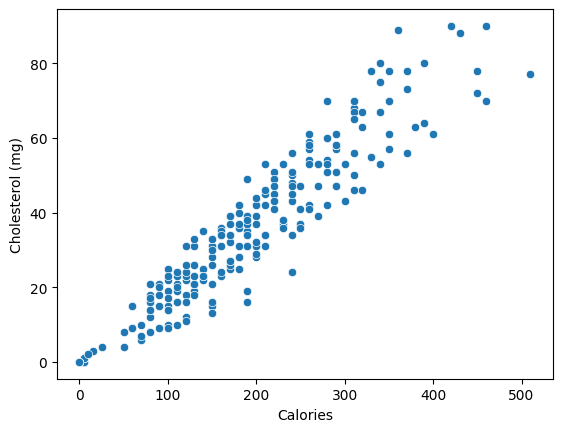

In [56]:
sns.scatterplot(data = new_data , x = 'Calories' , y = 'Cholesterol (mg)')

so increase in cholestrol leads to increase in calories

<Axes: xlabel='Calories', ylabel='Total Carbohydrates (g)'>

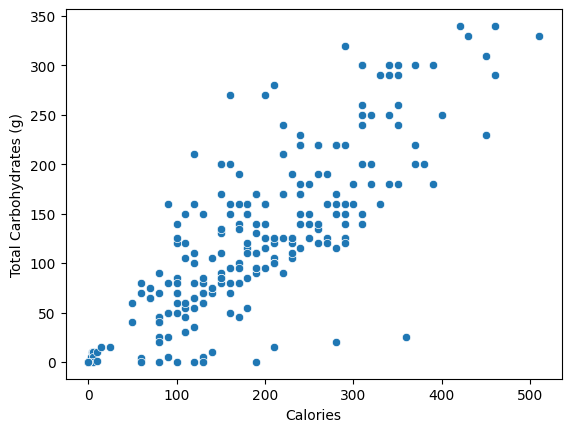

In [57]:
sns.scatterplot(data = new_data , x = 'Calories' , y = 'Total Carbohydrates (g)')

so increase in carbohydrate leads to increase in calories

<Axes: xlabel='Sugars (g)', ylabel='Cholesterol (mg)'>

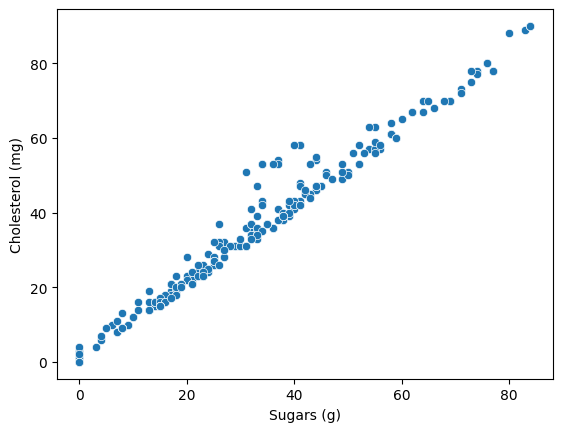

In [58]:
sns.scatterplot(data = new_data , x = 'Sugars (g)' , y = 'Cholesterol (mg)')

so increase in sugar leads to increase in cholestrol

In [59]:
# which beverage has low Cholestrol

min_chol = new_data['Cholesterol (mg)'].min()

new_data[new_data['Cholesterol (mg)']==min_chol]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,10
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,10
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,10
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,10


In [60]:
max_cal = new_data['Calcium (% DV)'].max()
min_cal = new_data['Calcium (% DV)'].min()

In [61]:
new_data[new_data['Calcium (% DV)']==max_cal]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450,7.0,6.0,0.0,10,310,78,0,74,19.0,25,2,60,2,150
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20,4,60,2,150
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,13.0,6.0,0.0,5,290,70,1,64,16.0,15,2,60,20,150
127,Tazo® Tea Drinks,Tazo® Green Tea Latte,Venti Nonfat Milk,370,0.5,0.3,0.0,10,200,73,2,71,18.0,30,20,60,6,110
129,Tazo® Tea Drinks,Tazo® Green Tea Latte,Soymilk,390,8.0,1.0,0.0,0,180,64,4,58,14.0,20,20,60,30,110


If you are deffiecient in calcium prefer these drinks

In [62]:
# beverages which has less amount of calcium

new_data[new_data['Calcium (% DV)']==min_cal]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
40,Classic Espresso Drinks,Caffè Americano,Short,5,0.0,0.0,0.0,0,5,1,0,0,0.4,0,0,0,0,75
56,Classic Espresso Drinks,Espresso,Solo,5,0.0,0.0,0.0,0,0,1,0,0,0.4,0,0,0,0,75
57,Classic Espresso Drinks,Espresso,Doppio,10,0.0,0.0,0.0,0,1,2,0,0,1.0,0,0,0,0,150
98,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Short,140,0.0,0.0,0.0,0,10,35,0,33,0.0,0,0,0,0,0
99,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Tall,210,0.0,0.0,0.0,0,15,53,0,49,0.0,0,0,0,0,0
100,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Grande,280,0.0,0.0,0.0,0,20,70,0,65,0.0,0,0,0,0,0
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0.0,0.0,0.0,0,25,89,0,83,0.0,0,0,0,0,0


If you are deffiecient in calcium don't prefer these drinks

In [63]:
# Which beverage has high sodium content

max_sod = new_data['Sodium (mg)'].max()

new_data[new_data['Sodium (mg)']==max_sod]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
128,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,450,10.0,5.0,0.3,40,230,72,2,71,17.0,25,20,50,6,110


In [64]:
# which beverage has low sodium content

min_sod = new_data['Sodium (mg)'].min()

new_data[new_data['Sodium (mg)']==min_sod]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6,0,20,8,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Grande Nonfat Milk,230,0.2,0.1,0.0,0,190,53,0,52,4.0,8,6,15,4,0
234,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,240,2.0,0.2,0.0,0,180,51,1,49,3.0,4,6,15,8,0
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,32.0,0.4,0.0,0,250,67,1,64,5.0,6,8,20,10,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6,0,10,0,0


In [65]:
# which beverage has high vitamin A

max_vitA = new_data['Vitamin A (% DV)'].max()

new_data[new_data['Vitamin A (% DV)']==max_vitA]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
175,Smoothies,Orange Mango Banana Smoothie,Grande Nonfat Milk,260,1.0,0.3,0.0,5,120,54,6,37,16.0,50,80,10,30,15
176,Smoothies,Orange Mango Banana Smoothie,2% Milk,270,1.5,0.5,0.0,5,125,53,6,37,16.0,50,80,10,6,0
177,Smoothies,Orange Mango Banana Smoothie,Soymilk,270,1.5,0.4,0.0,5,120,53,6,36,15.0,50,80,10,6,0


In [66]:
# which beverage has low vitamin A

min_vitA = new_data['Vitamin A (% DV)'].min()

new_data[new_data['Vitamin A (% DV)']==min_vitA]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
40,Classic Espresso Drinks,Caffè Americano,Short,5,0.0,0.0,0.0,0,5,1,0,0,0.4,0,0,0,0,75
41,Classic Espresso Drinks,Caffè Americano,Tall,10,0.0,0.0,0.0,0,10,2,0,0,1.0,0,0,2,0,150
42,Classic Espresso Drinks,Caffè Americano,Grande,15,0.0,0.0,0.0,0,15,3,0,0,1.0,0,0,2,0,225
43,Classic Espresso Drinks,Caffè Americano,Venti,25,0.0,0.0,0.0,0,15,4,0,0,1.0,0,0,2,0,300
56,Classic Espresso Drinks,Espresso,Solo,5,0.0,0.0,0.0,0,0,1,0,0,0.4,0,0,0,0,75
57,Classic Espresso Drinks,Espresso,Doppio,10,0.0,0.0,0.0,0,1,2,0,0,1.0,0,0,0,0,150


In [67]:
# which beverage has high vitamin C

max_vitC = new_data['Vitamin C (% DV)'].max()

new_data[new_data['Vitamin C (% DV)']==max_vitC]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
178,Smoothies,Strawberry Banana Smoothie,Grande Nonfat Milk,290,1.0,0.3,0.0,5,125,58,7,41,16.0,4,100,10,8,0
179,Smoothies,Strawberry Banana Smoothie,2% Milk,290,2.0,1.0,0.0,5,125,58,7,41,16.0,4,100,10,8,0
180,Smoothies,Strawberry Banana Smoothie,Soymilk,290,2.0,0.4,0.0,5,120,58,8,40,16.0,2,100,10,8,0


In [68]:
# which beverage has low vitamin C

min_vitC = new_data['Vitamin C (% DV)'].min()

new_data[new_data['Vitamin C (% DV)']==min_vitC]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,Frappuccino® Light Blended Coffee,Java Chip,Venti Nonfat Milk,290,5.0,4.0,0.0,5,320,58,2,52,7.0,8,0,15,35,165
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6,0,10,0,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6,0,10,0,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4,0,10,6,0


In [69]:
# which beverage has high iron

max_iron = new_data['Iron (% DV)'].max()

new_data[new_data['Iron (% DV)']==max_iron]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
27,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Soymilk,290,9.0,2.5,0.0,0,140,47,4,33,14.0,15,0,45,50,180
97,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Soymilk,330,9.0,2.5,0.0,0,160,55,4,44,15.0,15,0,50,50,30


In [70]:
# which beverage has low iron

min_iron = new_data['Iron (% DV)'].min()

new_data[new_data['Iron (% DV)']==min_iron]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Frappuccino® Light Blended Coffee,Caramel,Tall Nonfat Milk,100,0.1,0.0,0.0,0,140,23,0,23,3.0,4,0,8,0,65
224,Frappuccino® Light Blended Coffee,Caramel,Grande Nonfat Milk,150,0.1,0.1,0.0,0,200,33,0,32,3.0,6,0,10,0,90
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6,0,10,0,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6,0,10,0,0


In [71]:
new_data['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 10, '50', '70', '120', '55',
       '80', '110', '165', '235', '90', 90, '125', '170', 20, 30, '15',
       '130', '140', '100', '145', '65', '105'], dtype=object)

In [72]:
new_data['Caffeine (mg)'] = new_data['Caffeine (mg)'].astype(int)
new_data['Caffeine (mg)'].unique()

array([175, 260, 330, 410,  75, 150,  85,  95, 180, 225, 300,  10,  20,
        25,  30,   0,  50,  70, 120,  55,  80, 110, 165, 235,  90, 125,
       170,  15, 130, 140, 100, 145,  65, 105])

In [73]:
# which beverage has high caffeine

max_caff = new_data['Caffeine (mg)'].max()

new_data[new_data['Caffeine (mg)']==max_caff]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410


In [74]:
# which beverage has low Caffeine (mg)

min_caff = new_data['Caffeine (mg)'].min()

new_data[new_data['Caffeine (mg)']==min_caff]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
98,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Short,140,0.0,0.0,0.0,0,10,35,0,33,0.0,0,0,0,0,0
99,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Tall,210,0.0,0.0,0.0,0,15,53,0,49,0.0,0,0,0,0,0
100,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Grande,280,0.0,0.0,0.0,0,20,70,0,65,0.0,0,0,0,0,0
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0.0,0.0,0.0,0,25,89,0,83,0.0,0,0,0,0,0
142,Tazo® Tea Drinks,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Short Nonfat Milk,80,0.1,0.1,0.0,0,45,16,0,16,4.0,6,0,10,0,0
143,Tazo® Tea Drinks,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),2% Milk,90,2.0,1.0,0.1,10,50,15,0,15,3.0,6,0,10,0,0
144,Tazo® Tea Drinks,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Soymilk,80,1.5,0.2,0.0,0,40,14,0,13,3.0,4,0,10,6,0
145,Tazo® Tea Drinks,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Tall Nonfat Milk,120,0.1,0.1,0.0,5,65,23,0,23,5.0,10,0,20,0,0
146,Tazo® Tea Drinks,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),2% Milk,140,3.0,1.5,0.1,15,75,23,0,23,5.0,8,0,15,0,0
147,Tazo® Tea Drinks,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Soymilk,130,2.5,0.3,0.0,0,60,21,1,19,4.0,6,0,20,8,0


In [75]:
correlation = new_data.select_dtypes(include=['number']).corr()

<Axes: >

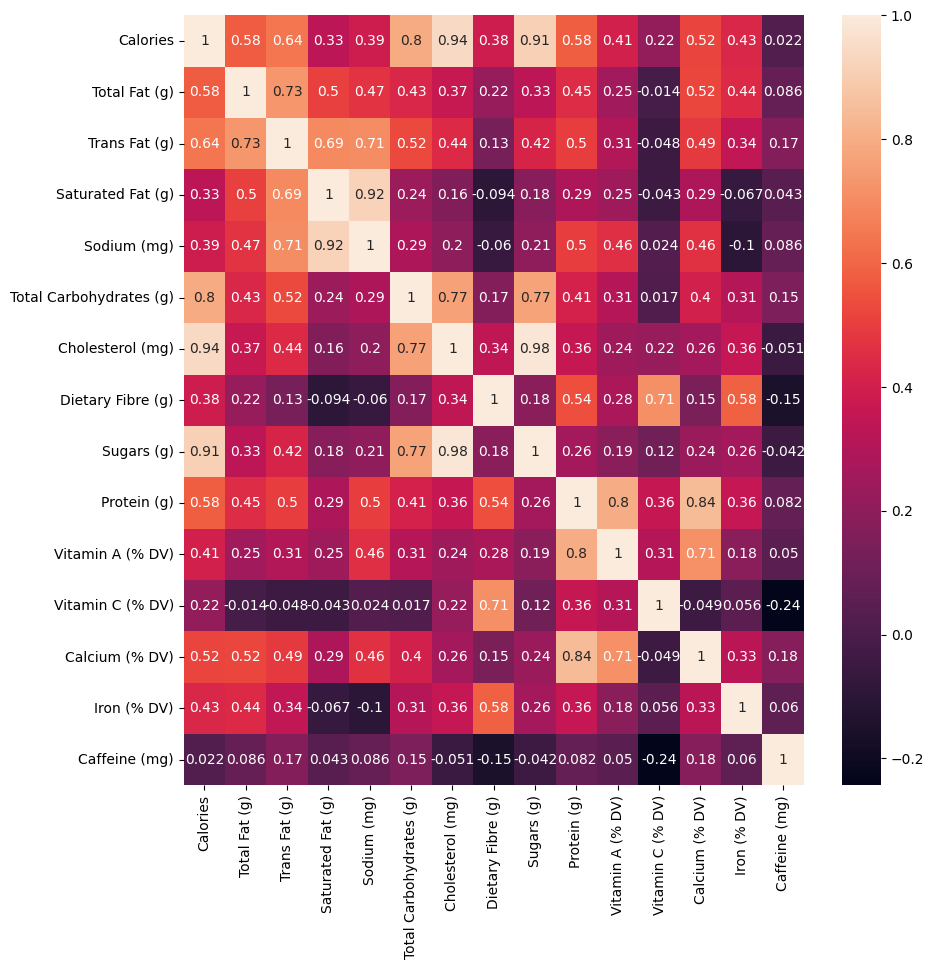

In [76]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation , annot = True)

In [77]:
new_data.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

In [78]:
# top 5 beverage with high calories

bhv = new_data[['Beverage', 'Beverage_prep', 'Calories']].sort_values(by = 'Calories',ascending = False).head(5)
bhv

,Beverage,Beverage_prep,Calories
84,White Chocolate Mocha (Without Whipped Cream),2% Milk,510
215,Java Chip (Without Whipped Cream),Whole Milk,460
85,White Chocolate Mocha (Without Whipped Cream),Soymilk,460
83,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450
128,Tazo® Green Tea Latte,2% Milk,450


In [79]:
# top 5 beverage with high caffeine

bhc = new_data[['Beverage', 'Beverage_prep', 'Caffeine (mg)']].sort_values(by = 'Caffeine (mg)' , ascending = False).head(5)
bhc

,Beverage,Beverage_prep,Caffeine (mg)
3,Brewed Coffee,Venti,410
2,Brewed Coffee,Grande,330
43,Caffè Americano,Venti,300
1,Brewed Coffee,Tall,260
156,Iced Brewed Coffee (With Classic Syrup),Venti,235


In [80]:
# top 5 beverage with high Cholestrol

bhcl = new_data[['Beverage', 'Beverage_prep', 'Cholesterol (mg)']].sort_values(by = 'Cholesterol (mg)' , ascending = False).head(5)
bhcl

,Beverage,Beverage_prep,Cholesterol (mg)
215,Java Chip (Without Whipped Cream),Whole Milk,90
214,Java Chip (Without Whipped Cream),Venti Nonfat Milk,90
101,Caramel Apple Spice (Without Whipped Cream),Venti,89
216,Java Chip (Without Whipped Cream),Soymilk,88
196,Mocha (Without Whipped Cream),Venti Nonfat Milk,80


In [81]:
# top 5 beverage with high sugar

bhs = new_data[['Beverage', 'Beverage_prep', 'Sugars (g)']].sort_values(by = 'Sugars (g)' , ascending = False).head(5)
bhs

,Beverage,Beverage_prep,Sugars (g)
214,Java Chip (Without Whipped Cream),Venti Nonfat Milk,84
215,Java Chip (Without Whipped Cream),Whole Milk,84
101,Caramel Apple Spice (Without Whipped Cream),Venti,83
216,Java Chip (Without Whipped Cream),Soymilk,80
206,Caramel (Without Whipped Cream),Whole Milk,77


In [82]:
# Top 5 beverage with high protein

bhp = new_data[['Beverage', 'Beverage_prep', 'Protein (g)']].sort_values(by = 'Protein (g)' , ascending = False).head(5)
bhp

,Beverage,Beverage_prep,Protein (g)
172,Banana Chocolate Smoothie,Grande Nonfat Milk,20.0
173,Banana Chocolate Smoothie,2% Milk,20.0
174,Banana Chocolate Smoothie,Soymilk,19.0
83,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,19.0
84,White Chocolate Mocha (Without Whipped Cream),2% Milk,19.0


In [83]:
# Top 5 beverage with high amount of Trans Fat

bhtf = new_data[['Beverage', 'Beverage_prep', 'Trans Fat (g)']].sort_values(by = 'Trans Fat (g)' , ascending = False).head(5)
bhtf

,Beverage,Beverage_prep,Trans Fat (g)
84,White Chocolate Mocha (Without Whipped Cream),2% Milk,9.0
81,White Chocolate Mocha (Without Whipped Cream),2% Milk,7.0
215,Java Chip (Without Whipped Cream),Whole Milk,7.0
26,Caffè Mocha (Without Whipped Cream),2% Milk,6.0
78,White Chocolate Mocha (Without Whipped Cream),2% Milk,6.0


Health Impact: Trans fats are considered the most harmful type of fat. They not only raise LDL (bad) cholesterol levels but also lower HDL (good) cholesterol levels, significantly increasing the risk of heart disease, stroke, and type 2 diabetes. Due to these risks, many health organizations recommend minimizing trans fat intake.

In [84]:
# Top 5 beverage with high amount of Saturated Fat

bhsf = new_data[['Beverage', 'Beverage_prep', 'Saturated Fat (g)']].sort_values(by = 'Saturated Fat (g)' , ascending = False).head(5)
bhsf

,Beverage,Beverage_prep,Saturated Fat (g)
96,Hot Chocolate (Without Whipped Cream),2% Milk,0.3
14,Caffè Latte,2% Milk,0.3
38,Vanilla Latte (Or Other Flavoured Latte),2% Milk,0.3
128,Tazo® Green Tea Latte,2% Milk,0.3
32,Vanilla Latte (Or Other Flavoured Latte),2% Milk,0.2


Health Impact: High intake of saturated fat is associated with an increased risk of heart disease because it can raise levels of LDL (bad) cholesterol in the blood.